## Final Project Submission

Please fill out:
* Student name: George Mochama Edwin
* Student pace: Part time
* Scheduled project review date/time: 08/09/2024
* Instructor name: Mr William Okomba
* Blog post URL: https://github.com/mojay6111/dsc-phase-1-project_1/tree/master


# OVERVIEW

## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


# Business Understanding
As we expand into the aviation industry, I recognize the importance of thoroughly understanding the risks associated with purchasing and operating aircraft for both commercial and private enterprises. To ensure our success and minimize potential hazards, I will use the CRISP-DM methodology to systematically analyze aviation risks. My focus will be on identifying the aircraft with the lowest risk, predicting which models are more likely to be involved in accidents, and examining the environmental and operational factors that contribute to these risks.

To achieve this, I will gather and analyze data on aircraft specifications, safety records, incident reports, and more. By applying advanced modeling techniques, I’ll be able to provide actionable insights that will guide our decisions on which aircraft to purchase and how to operate them safely. Ultimately, my goal is to deliver clear, data-driven recommendations that will help us confidently enter the aviation industry while ensuring the highest level of safety and operational efficiency.

## Objectives
* To determine which aircraft/make have the lowest risk for our company.
* To identify aircraft models most likely to be involved in accidents.
* To pinpoint locations or environments where incidents happen more frequently to guide our operational decisions.
* To evaluate whether we should invest in amateur-built aircraft.
* To analyze the dataset to find aircraft types with the lowest incident and accident rates.
* To determine the key factors that contribute to aviation risks, such as weather, flight phase, and aircraft age.
* To examine the purpose of the flight to see how it affects risk levels.

# Questions To Consider
* What specific criteria define "low risk" for aircraft, and how should these criteria be prioritized.
* How do environmental factors like weather and geography influence the likelihood of an accident for certain aircraft types?
* What impact does the purpose of the flight (e.g., commercial, cargo, private) have on the overall risk profile of different aircraft models?

# Data Understanding and Analysis

# Importing necessary Python Libraries

In [193]:
# Numpy for numerical operations, especially for working with arrays
import numpy as np

# Pandas  for data manipulation and analysis, especially for working with DataFrames
import pandas as pd

# Seaborn for data visualization, building on top of Matplotlib to provide enhanced graphing capabilities
import seaborn as sns

# Matplotlib's pyplot for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# %matplotlib inline to display plots inline in Jupyter notebooks.
%matplotlib inline


# Loading the data

In [194]:
# Loading the data.
data = pd.read_csv('AviationData.csv',  encoding='ISO-8859-1')

<ipython-input-194-b29267527608>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('AviationData.csv',  encoding='ISO-8859-1')


# Dataset Overview and Validation

In [195]:
# Display the first few rows of the dataset to get an overview of its structure
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [196]:
# Display the last few rows of the dataset to check the final entries
data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [197]:
# Display the list of column names in the dataset
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [198]:
# Count the total number of columns in the dataset, ensuring no duplicates
data.columns.value_counts().sum()

31

In [199]:
# Checking for any missing values in the dataset
data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [200]:
# Get summary statistics for numerical columns
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [201]:
# Get summary statistics for numerical columns, transposed for easier reading
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [202]:
# Check the data types of each column
data.dtypes


Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [203]:
# Display the number of unique values for each column
data.nunique()


Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25592
Longitude                 27156
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

In [204]:
# Check for any duplicate rows in the dataset
data.duplicated().sum()


0

# DATA CLEANING

In [205]:
# Calculate the percentage of missing values for each column
missing_data_percentage = data.isnull().mean() * 100
missing_data_percentage.count()

31

In [206]:
columns_with_missing_data = missing_data_percentage[missing_data_percentage > 0]
columns_with_missing_data

Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30.560587
Report.Status              7.178616
Publication.Date          15.492356
dtype: float64

In [207]:
# Displaying columns with more than a 40% percentage of missing data
high_missing_data = missing_data_percentage[missing_data_percentage > 40].index
high_missing_data

Index(['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier'],
      dtype='object')

Dropping columns with too much missing data(more that 40 % and not useful in data)

In [208]:
# Dropping the,mkz specified columns from the DataFrame
data.drop(columns=['Latitude', 'Longitude', 'Air.carrier', 'Airport.Code', 'Publication.Date',], inplace=True)

In [209]:
# Checking the remaing columns
data.columns.value_counts()

Event.Id                  1
Investigation.Type        1
Broad.phase.of.flight     1
Weather.Condition         1
Total.Uninjured           1
Total.Minor.Injuries      1
Total.Serious.Injuries    1
Total.Fatal.Injuries      1
Purpose.of.flight         1
Schedule                  1
FAR.Description           1
Engine.Type               1
Number.of.Engines         1
Amateur.Built             1
Model                     1
Make                      1
Registration.Number       1
Aircraft.Category         1
Aircraft.damage           1
Injury.Severity           1
Airport.Name              1
Country                   1
Location                  1
Event.Date                1
Accident.Number           1
Report.Status             1
dtype: int64

In [210]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [211]:
# Fill null values in the 'Location' column with 'Unknown'
data['Location'].fillna('Unknown', inplace=True)

# Verifying that the null values have been replaced
print(data['Location'].isnull().sum())

0


In [212]:
# Fill null values in the 'Country' column with 'Unknown'
data['Country'].fillna('Unknown', inplace=True)

# Verifying that the null values have been replaced
print(data['Country'].isnull().sum())

0


In [213]:
# Fill null values in the 'Airport.Name' column with 'Unknown'
data['Airport.Name'].fillna('Unknown', inplace=True)

# Verifying that the null values have been replaced
print(data['Airport.Name'].isnull().sum())

0


In [214]:
# Forward fill missing values in Aircraft.Damage column
data['Aircraft.damage'] = data['Aircraft.damage'].ffill()

# Verifying that the null values have been replaced
print(data['Aircraft.damage'].isnull().sum())

0


In [215]:
# Finding the mode (most frequent value) of the 'Aircraft.Category' column
mode_value = data['Aircraft.Category'].mode()[0]

# Filling the null values in the 'Aircraft.Category' column with the mode value
data['Aircraft.Category'].fillna(mode_value, inplace=True)

# Verifying that the null values have been replaced
print(data['Aircraft.Category'].isnull().sum())

0


To make the values in the Injury.Severity column uniform (i.e., removing the numbers in brackets and ensuring the values read just "Fatal" or "Nonfatal"), I will use a regular expression to remove any text within parentheses.

In [216]:
# Import regular expressions module
import re

# Remove any numbers or text within parentheses in 'Injury.Severity' column
data['Injury.Severity'] = data['Injury.Severity'].replace(to_replace=r'Fatal.*', value='Fatal', regex=True)

# Verify the changes
print(data['Injury.Severity'].unique())

['Fatal' 'Non-Fatal' 'Incident' 'Unavailable' nan 'Minor' 'Serious']


In [217]:
# Replacing null values in the 'Injury.Severity' column with 'Unknown'
data['Injury.Severity'].fillna('Unknown', inplace=True)

# Verifying that the null values have been replaced
print(data['Injury.Severity'].isnull().sum())

0


In [218]:
# Replacing null values in the 'Registration.Number' column with 'Unknown'
data['Registration.Number'].fillna('Unknown', inplace=True)

# Verifying that the null values have been replaced
print(data['Registration.Number'].isnull().sum())

0


In [219]:
# Capitalizing all values in the 'Make' column
data['Make'] = data['Make'].str.upper()

# Verifying the changes by displaying unique values
print(data['Make'].unique())

['STINSON' 'PIPER' 'CESSNA' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']


To ensure that all values in the Make column that start with or contain the phrase "CESSNA" remain as just "CESSNA" (removing any text before or after it), I will use a regular expression to match and replace the relevant entries. 

In [220]:
# Replacing any value that contains 'CESSNA' with just 'CESSNA'
data['Make'] = data['Make'].replace(to_replace=r'.*CESSNA.*', value='CESSNA', regex=True)

# Verifying the changes by displaying unique values
print(data['Make'].unique())


['STINSON' 'PIPER' 'CESSNA' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']


In [221]:
# Replacing 'CESNA' with 'CESSNA' in the 'Make' column
data['Make'] = data['Make'].replace('CESNA', 'CESSNA')

# Verifying the changes by displaying unique values
print(data['Make'].unique())

['STINSON' 'PIPER' 'CESSNA' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']


In [222]:
# Counting occurrences of each unique value in the 'Make' column
make_counts = data['Make'].value_counts()

# Displaying the counts
print(make_counts)


CESSNA           27216
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
LUTES                1
IZATT                1
MINCE                1
DANA A. MOORE        1
ROYSE RALPH L        1
Name: Make, Length: 7571, dtype: int64


In [223]:
# Checking for null values in the 'Make' column
null_count_make = data['Make'].isnull().sum()

# Displaying the count of null values
print(null_count_make)


63


In [224]:
# Replacing null values in the 'Make' column with 'UNKNOWN'
data['Make'].fillna('UNKNOWN', inplace=True)

# Verifying that the null values are being replaced
print(data['Make'].isnull().sum())


0


In [225]:
# Checking for null values in the 'Model' column
null_count_model = data['Model'].isnull().sum()

null_count_model

92

In [226]:
# Replacing null values in the 'Model' column with 'Unknown'
data['Model'].fillna('Unknown', inplace=True)

# Verifying that the null values are being replaced
print(data['Model'].isnull().sum())

0


In [227]:
# Finding the mode value of the 'Amateur.Built' column
mode_value = data['Amateur.Built'].mode()[0]

# Replacing null values in the 'Amateur.Built' column with the mode value
data['Amateur.Built'].fillna(mode_value, inplace=True)

# Verifying that the null values are being replaced
print(data['Amateur.Built'].isnull().sum())


0


In [228]:
# Finding the mode value of the 'Number.of.Engines' column
mode_value = data['Number.of.Engines'].mode()[0]

# Replacing null values with the mode value
data['Number.of.Engines'].fillna(mode_value, inplace=True)

# Verifying that the null values are being replaced
print(data['Number.of.Engines'].isnull().sum())

0


In [229]:
# Finding the mode value of the 'Engine.Type' column
mode_value = data['Engine.Type'].mode()[0]

# Replacing null values in the 'Engine.Type' column with the mode value
data['Engine.Type'].fillna(mode_value, inplace=True)

# Verifying that the null values are being replaced
print(data['Engine.Type'].isnull().sum())

0


In [230]:
pd.set_option('display.max_columns', None)
data.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Fatal,Destroyed,Airplane,NC6404,STINSON,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Fatal,Destroyed,Airplane,N5069P,PIPER,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Fatal,Destroyed,Airplane,N5142R,CESSNA,172M,No,1.0,Reciprocating,NaN,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Fatal,Destroyed,Airplane,N1168J,ROCKWELL,112,No,1.0,Reciprocating,NaN,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Fatal,Destroyed,Airplane,N15NY,CESSNA,501,No,1.0,Reciprocating,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Unknown,Non-Fatal,Substantial,Airplane,CF-TLU,MCDONNELL DOUGLAS,DC9,No,2.0,Turbo Fan,Part 129: Foreign,SCHD,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Unknown,Fatal,Destroyed,Airplane,N4988E,CESSNA,180,No,1.0,Reciprocating,NaN,NaN,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,CESSNA,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,CESSNA,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JACKSONVILLE INTL,Non-Fatal,Substantial,Airplane,N3906K,NORTH AMERICAN,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause


In [231]:
# Replacing null values with 'Unknown' in the FAR.Description
data['FAR.Description'].fillna('Unknown', inplace=True)

# Verifying that the null values are being replaced
print(data['FAR.Description'].isnull().sum())

0


In [232]:
# Replacing null values in the 'Schedule' column with 'Unknown'
data['Schedule'].fillna('Unknown', inplace=True)

# Verifying that the null values are being replaced
print(data['Schedule'].isnull().sum())


0


In [233]:
# Replacing null values in the 'Purpose of Flight' column with 'Unknown'
data['Purpose.of.flight'].fillna('Unknown', inplace=True)

# Verifying that the null values are being replaced
print(data['Purpose.of.flight'].isnull().sum())

0


In [234]:
# Inferring at least 1 fatality if severity is 'Fatal'
data.loc[(data['Total.Fatal.Injuries'].isnull()) & (data['Injury.Severity'] == 'Fatal'), 'Total.Fatal.Injuries'] = 1

# Setting 0 fatality if severity is 'Non-Fatal'
data.loc[(data['Total.Fatal.Injuries'].isnull()) & (data['Injury.Severity'] == 'Non-Fatal'), 'Total.Fatal.Injuries'] = 0

# Replacing null values in 'Total.Fatal.Injuries' with 'Unknown'
data['Total.Fatal.Injuries'].fillna('Unknown', inplace=True)

# Verifying the changes
print(data['Total.Fatal.Injuries'].isnull().sum())


0


In [235]:
# Replacing null values in 'Total.Serious.Injuries' with 'Unknown'
data['Total.Serious.Injuries'].fillna('Unknown', inplace=True)

# Replacing null values in 'Total.Minor.Injuries' with 'Unknown'
data['Total.Minor.Injuries'].fillna('Unknown', inplace=True)

# Replacing null values in 'Total.Uninjured' with 'Unknown'
data['Total.Uninjured'].fillna('Unknown', inplace=True)

# Verifying the changes
print(data[['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].isnull().sum())


Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64


In [236]:
# Replacing null values in 'Weather.Condition' with 'UNK'
data['Weather.Condition'].fillna('UNK', inplace=True)

# Replacing null values in 'Broad.phase.of.flight' with 'Unknown'
data['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

# Verifying the changes
print(data[['Weather.Condition', 'Broad.phase.of.flight']].isnull().sum())


Weather.Condition        0
Broad.phase.of.flight    0
dtype: int64


In [237]:
# Replacing null values in 'Report.Status' with 'Not Reported'
data['Report.Status'].fillna('Not Reported', inplace=True)

# Verifying the changes
print(data['Report.Status'].isnull().sum())

0


In [238]:
# Displaying the total number of null values in each column
data.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [239]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,88889.0,1.136552,0.432545,0.0,1.0,1.0,1.0,8.0


In [240]:
# Generating descriptive statistics for numerical columns
summary_statistics = data.describe(include=[np.number])

# Displaying the summary statistics
print(summary_statistics)


       Number.of.Engines
count       88889.000000
mean            1.136552
std             0.432545
min             0.000000
25%             1.000000
50%             1.000000
75%             1.000000
max             8.000000


In [241]:
# Generating descriptive statistics for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Displaying the count of unique values for each categorical column
for column in categorical_columns:
    print(f"--- {column} ---")
    print(data[column].value_counts(dropna=False))
    print("\n")


--- Event.Id ---
20001212X19172    3
20001214X45071    3
20220730105623    2
20051213X01965    2
20001212X16765    2
                 ..
20001211X14216    1
20001211X14239    1
20001211X14207    1
20001211X14204    1
20221230106513    1
Name: Event.Id, Length: 87951, dtype: int64


--- Investigation.Type ---
Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64


--- Accident.Number ---
CEN22LA149    2
WPR23LA041    2
WPR23LA045    2
DCA22WA214    2
DCA22WA089    2
             ..
LAX92FA065    1
ANC92T#A12    1
MIA92LA049    1
NYC92LA048    1
ERA23LA097    1
Name: Accident.Number, Length: 88863, dtype: int64


--- Event.Date ---
1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-29     1
Name: Event.Date, Length: 14782, dtype: int64


--- Location ---
ANCHORAGE, AK       434
MIAMI, FL           200
ALBUQUERQUE, NM     196
HOUSTON, TX      

In [242]:
# Generate summary statistics for injury columns
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Summary statistics
injury_summary = data[injury_columns].describe().T

# Displaying the summary statistics
print("Summary Statistics for Injury Columns:")
print(injury_summary)


Summary Statistics for Injury Columns:
                          count  unique  top     freq
Total.Fatal.Injuries    88889.0   126.0  0.0  70346.0
Total.Serious.Injuries  88889.0    51.0  0.0  63289.0
Total.Minor.Injuries    88889.0    58.0  0.0  61454.0
Total.Uninjured         88889.0   380.0  0.0  29879.0


In [243]:
# Displaying frequency distribution for injury columns
for column in injury_columns:
    print(f"--- {column} ---")
    print(data[column].value_counts(dropna=False))
    print("\n")


--- Total.Fatal.Injuries ---
0.0      70346
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
156.0        1
68.0         1
31.0         1
115.0        1
176.0        1
Name: Total.Fatal.Injuries, Length: 126, dtype: int64


--- Total.Serious.Injuries ---
0.0        63289
Unknown    12510
1.0         9125
2.0         2815
3.0          629
4.0          258
5.0           78
6.0           41
7.0           27
9.0           16
8.0           13
10.0          13
13.0           9
11.0           6
12.0           5
26.0           5
14.0           5
20.0           3
25.0           3
28.0           3
59.0           2
47.0           2
21.0           2
50.0           2
17.0           2
53.0           1
67.0           1
34.0           1
33.0           1
125.0          1
35.0           1
137.0          1
19.0           1
27.0           1
88.0           1
161.0          1
41.0           1
44.0           1
63.0           1
55.0           1
23.0           1
43.0           1
39.0 

TypeError: '<=' not supported between instances of 'float' and 'str'

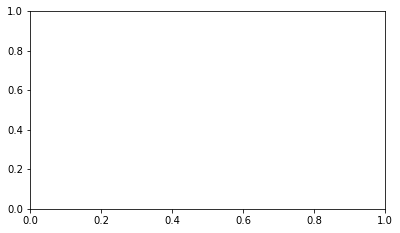

In [244]:
import matplotlib.pyplot as plt

# Plotting histograms for each injury column
plt.figure(figsize=(14, 8))

for i, column in enumerate(injury_columns, 1):
    plt.subplot(2, 2, i)
    data[column].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
